## Herleitung des Wiener Filters

##### TODO: Grafik einfügen
<!--- ![Alt-Text](test2.jpg) --->

#### Annahmen:

$$\begin{align*}
    g = h \ast f + n \; &\Longrightarrow \; G = H \cdot F + N \tag{1}\\
    \hat f = g \ast w \; &\Longrightarrow \; \hat F = G \cdot W \tag{2}\\
\end{align*}$$

$$\begin{align*}
    S_{FF} &= \mathbb{E}\Big[\big\|F\big\|^2\Big] \tag{3}\\
    S_{NN} &= \mathbb{E}\Big[\big\|N\big\|^2\Big] \tag{4}\\
     
\end{align*}$$

Das Bild und das Rauschen sind unkorreliert:
$$\begin{align*}
    S_{FN} = \mathbb{E}\Big[F^*N\Big] = \mathbb{E}\Big[FN^*\Big] = 0 \tag{5}\\ 
\end{align*}$$



#### Herleitung:

Minimierung des quadratischen Fehlers vom Orginalbild und des rekonstruierten Bildes:
$$\begin{equation*}
    \mathbb{E}\Big[\big\|\hat F - F\big\|^2\Big] \overset{(2)}{=} E\Big[\big\|GW - F\big\|^2\Big] \\
\end{equation*}$$

$$\begin{equation*}
    = \mathbb{E}\Big[\big\|GW\big\|^2 + \big\|F\big\|^2 - (GW)^*F - GWF^*\Big] \\
\end{equation*}$$

$$\begin{equation*}
    = \big\|W\big\|^2 \,\mathbb{E}\Big[\big\|G\big\|^2\Big] + \mathbb{E}\Big[\big\|F\big\|^2\Big] - W^* \,\mathbb{E}\Big[G^*F\Big] - W \,\mathbb{E}\Big[GF^*\Big] \\
\end{equation*}$$

$$\begin{equation*}
    \overset{(1,3)}{=} \big\|W\big\|^2 \,\mathbb{E}\Big[\big\|HF + N\big\|^2\Big] + S_{FF} - W^* \,\mathbb{E}\Big[(HF + N)^*F\Big] - W \,\mathbb{E}\Big[(HF + N)F^*\Big] \\
\end{equation*}$$

$$\begin{equation*}
    = \big\|W\big\|^2 \,\mathbb{E}\Big[\big\|HF\big\|^2 + \big\|N\big\|^2 + (HF)^*N + HFN^*\Big] + S_{FF} - W^* \,\mathbb{E}\Big[H^*\big\|F\big\|^2 + N^*F\Big] - W \,\mathbb{E}\Big[H\big\|F\big\|^2 + NF^*\Big]
\end{equation*}$$

$$\begin{align*}
    = &\big\|W\big\|^2 \Big(\big\|H\big\|^2 \,\mathbb{E}\Big[\big\|F\big\|^2\Big] + \mathbb{E}\Big[\big\|N\big\|^2\Big] + H^* \,\mathbb{E}\Big[F^*N\Big] + H \,\mathbb{E}\Big[FN^*\Big]\Big) + S_{FF} \\ &- W^* \Big(H^* \,\mathbb{E}\Big[\|F\|^2\Big] + \mathbb{E}\Big[N^*F\Big]\Big) - W \Big(H \,\mathbb{E}\Big[\big\|F\big\|^2\Big] + \mathbb{E}\Big[NF^*\Big]\Big) \\
\end{align*}$$

$$\begin{equation*}
    \overset{(3,4,5)}{=} \big\|W\big\|^2 \Big(\big\|H\big\|^2 S_{FF} + S_{NN} + H^*0 + H0\Big) + S_{FF} - W^* \Big(H^* S_{FF} + 0\Big) - W \Big(H S_{FF} + 0\Big) \\
\end{equation*}$$

$$\begin{equation*}
    = \big\|W\big\|^2 \Big(\big\|H\big\|^2 S_{FF} + S_{NN}\Big) + S_{FF} - W^*H^*S_{FF} - WHS_{FF}
\end{equation*}$$

Ableiten und Nullstellen:
$$\begin{align*}
    \frac{\partial \, \mathbb{E}\Big[\big\|\hat F - F\big\|^2\Big]}{\partial \, W} &= \frac{\partial \, \big\|W\big\|^2 \Big(\big\|H\big\|^2 S_{FF} + S_{NN}\Big) + S_{FF} - W^*H^*S_{FF} - WHS_{FF}}{\partial \, W} \\
    &= W^* \Big(\big\|H\big\|^2 S_{FF} + S_{NN}\Big) - HS_{FF} \overset{!}{=} 0 \\
\end{align*}$$

$$\begin{align*}
    &\Longleftrightarrow W^* \Big(\big\|H\big\|^2 S_{FF} + S_{NN}\Big) = HS_{FF} \\
    &\Longleftrightarrow W \Big(\big\|H\big\|^2 S_{FF} + S_{NN}\Big) = H^*S_{FF} \\
    &\Longleftrightarrow W = \frac{H^*S_{FF}}{\|H\|^2 S_{FF} + S_{NN}} = \frac{H^*}{\|H\|^2 + \frac{S_{NN}}{S_{FF}}}
\end{align*}$$

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def read_image(image_path):
    image = np.array(Image.open(image_path).convert('L'))
    normalized_image = image / image.max()
    return normalized_image

def show_images(image):
    plt.imshow(np.clip(0, 1, image), cmap='gray')
    plt.axis('off')
    plt.show()

In [4]:
def fft(image):
    return np.fft.fft2(image)

def ifft(image_fq):
    return np.abs(np.fft.ifft2(image_fq))

#### l2-Error:
$$\begin{equation*}
    \mathbb{e}^2 = \mathbb{E}\Big[\big\| \hat f - f \big\|^2\Big]
\end{equation*}$$

#### accuracy-smoothness-Error:
$$\begin{equation*}
    \mathbb{e}^{as} = \mathbb{E}\Big[\big\| \hat g - h \ast \hat f \big\|^2\Big] + \lambda \, \mathbb{E}\Big[\big\| \hat f^{\prime} \big\|^2\Big]
\end{equation*}$$


In [5]:
def l2_error(f, f_hat):
    return np.linalg.norm(f_hat - f)

def accuracy_smothness_error(g, f_hat, H, _lambda):
    data_accuracy = np.linalg.norm(g - ifft(fft(f_hat) * H))
    smothness = np.sum(np.square(np.gradient(f_hat)))
    return data_accuracy + _lambda * smothness

In [6]:
def inverse_filter(G, H):
    F_hat = G / H
    f_hat = ifft(F_hat)
    return f_hat

"""
G: blured image in frequency domain
H: motion blur filter in frequency domain
K: The noise-to-signal power ratio
"""
def wiener_filter(G, H, K):
    W = np.conjugate(H) / (np.abs(np.square(H)) + K)
    F_hat = W * G
    f_hat = ifft(F_hat)
    return f_hat



#### motion-blur-filter:
$$\begin{equation*}
    H(u,v) = T sinc\Big(\pi\big(u \Delta x + v \Delta y\big)\Big)\mathrm{e}^{\mathrm{i} \pi \big(u \Delta x + v \Delta y\big)}
\end{equation*}$$

#### gausian-noise-filter:
$$\begin{align*}
    n(x,y) &\sim \mathcal{N}\big(\mu,\sigma^2\big)\\
    N(u,v) &= \mathcal{F}\big(n(x,y)\big) \\
\end{align*}$$

In [7]:
def get_motion_blur_filter_fq(shape, T, dx, dy):
    U_DIM ,V_DIM = shape 
    H_u = np.arange(0, U_DIM, 1)
    H_v = np.arange(0, V_DIM, 1)
    
    H_U, H_V = np.meshgrid(H_v, H_u)
    H = np.dstack((H_U, H_V))

    dxy = np.array([dx, dy])

    def s(uv):
        return np.pi * uv.dot(dxy)
    
    H = np.apply_along_axis(s, axis=2, arr=H)
    H = T * np.sinc(H) * np.exp(-1j * H)    
      
    return H

def get_gausian_noise_filter_fq(shape, mean, var):
    n = np.random.normal(mean, var, shape)
    N = fft(n)
    return N

In [8]:
def plot_images_restauration(original_image, disturbed_image, restored_images, restored_titels, motion_blur_filter_fq, _lambda, _show_as_error=False):
    fig, ax = plt.subplots(1, len(restored_images) + 2)
    fig.set_size_inches((12, 10))

    ax[0].set_title(f'original image\n l2-error: {l2_error(original_image, original_image):.2f}{f',\n acc_smooth_error: {accuracy_smothness_error(disturbed_image, original_image, motion_blur_filter_fq, _lambda):.2f}' if _show_as_error else ""}')
    ax[0].imshow(original_image, cmap='gray')
    ax[0].axis('off')

    ax[1].set_title(f'disturbed image\n l2-error: {l2_error(original_image, disturbed_image):.2f}{f',\n acc_smooth_error: {accuracy_smothness_error(disturbed_image, disturbed_image, motion_blur_filter_fq, _lambda):.2f}' if _show_as_error else ""}')
    ax[1].imshow(disturbed_image, cmap='gray')
    ax[1].axis('off')

    for i in range(len(restored_images)):
        ax[i + 2].set_title(f'{restored_titels[i]}\n l2-error: {l2_error(original_image, restored_images[i]):.2f}{f',\n acc_smooth_error: {accuracy_smothness_error(disturbed_image, restored_images[i], motion_blur_filter_fq, _lambda):.2f}' if _show_as_error else ""}')
        ax[i + 2].imshow(restored_images[i], cmap='gray')
        ax[i + 2].axis('off')

    plt.tight_layout()
    plt.show()


In [30]:
def optimize_k(disturbed_image_fq, motion_blur_filter_fq, _lambda=0, _dropout=True, _max_iter=50):

    disturbed_image = ifft(disturbed_image_fq)

    best_error = np.inf
    best_k = 0.5
    step = 0.5

    for _ in tqdm(range(_max_iter), desc='Optimizing K'):

        last_iter_error = best_error
        K = np.linspace(best_k + step, best_k - step, 5, endpoint=False)[1:]     
        
        for k in K:
            if k < 0:
                continue
            restored_image = wiener_filter(disturbed_image_fq, motion_blur_filter_fq, k)
            error = accuracy_smothness_error(disturbed_image, restored_image, motion_blur_filter_fq, _lambda)
            if error < best_error:
                best_error = error
                best_k = k

        step /= 2
        if _dropout and last_iter_error - best_error < 0.01:
            break

    return best_k

In [48]:
image_path = 'test2.jpg'

_mb_T=1; _mb_dx=0.005; _mb_dy=0.001
_g_mean=0.05; _g_var=0.05

def test_restaurations(image_path, _mb_T=1, _mb_dx=0.005, _mb_dy=0.001, _g_mean=0.05, _g_var=0.05, _lambda=1):
    f = read_image(image_path)
    F = fft(f)
    H = get_motion_blur_filter_fq(F.shape, _mb_T, _mb_dx, _mb_dy)
    N = get_gausian_noise_filter_fq(F.shape, _g_mean, _g_var)

    G = H * F + N
    g = ifft(G)

    # wiener filter with knowledge of powerspectrum of image and noise
    S_F = np.mean(np.abs(np.square(F)))
    S_N = np.mean(np.abs(np.square(N)))

    f_hat = wiener_filter(G, H, S_N/S_F)

    # wiener filter with optimization of K
    optimal_k = optimize_k(G, H, _lambda=_lambda)

    f_hat_k = wiener_filter(G, H, optimal_k)

    plot_images_restauration(f, g, [f_hat, f_hat_k], ['restored image', 'restored image with optimization'], H, _lambda=_lambda, _show_as_error=True)

Optimizing K:   0%|          | 0/50 [00:00<?, ?it/s]

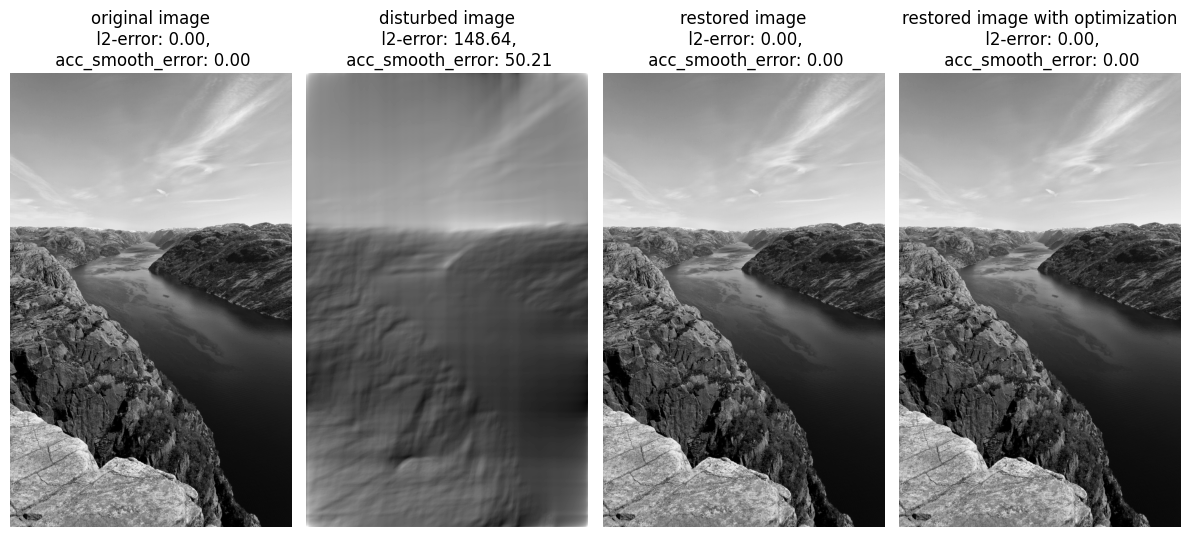

In [41]:
test_restaurations('test2.jpg', _mb_T=1, _mb_dx=0.004, _mb_dy=0.002, _g_mean=0, _g_var=0)

Optimizing K:   0%|          | 0/50 [00:00<?, ?it/s]

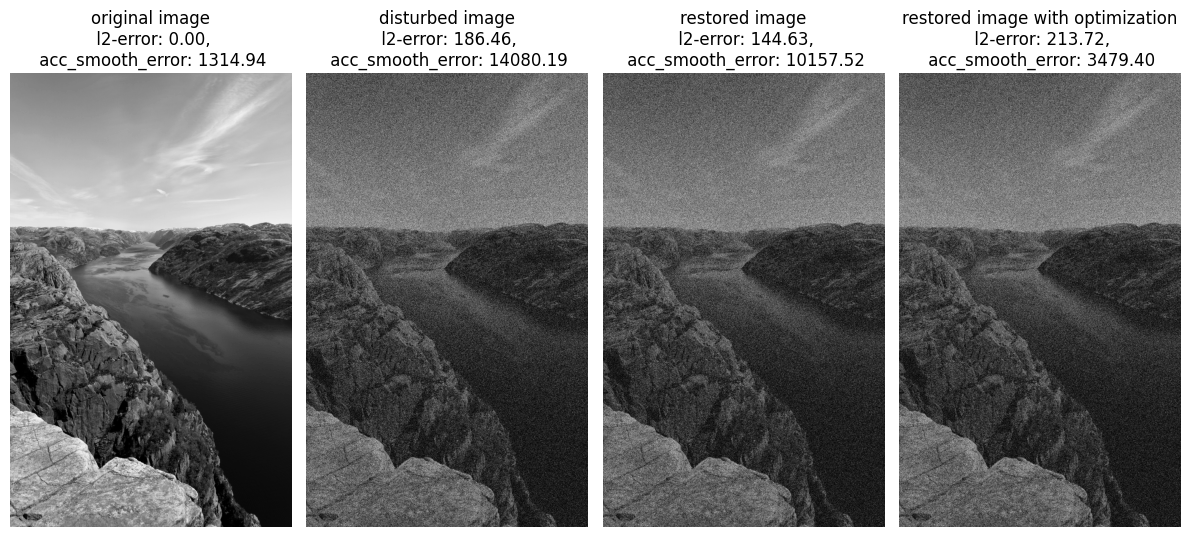

In [47]:
test_restaurations('test2.jpg', _mb_T=1, _mb_dx=0, _mb_dy=0, _g_mean=0.1, _g_var=0.2)

Optimizing K:   0%|          | 0/50 [00:00<?, ?it/s]

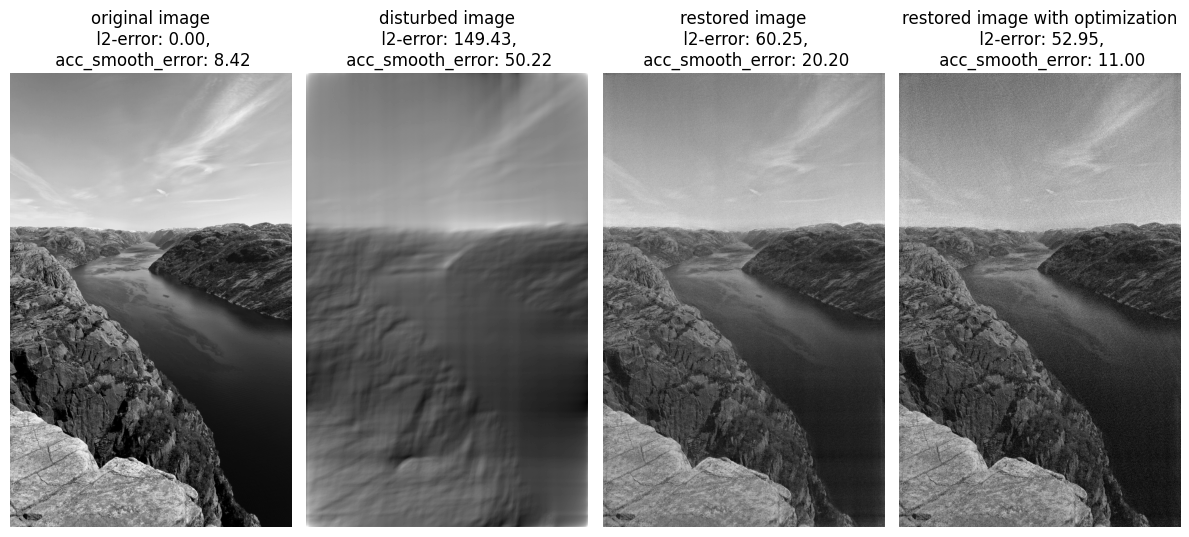

In [40]:
test_restaurations('test2.jpg', _mb_T=1, _mb_dx=0.004, _mb_dy=0.002, _g_mean=0.01, _g_var=0.002)

In [ ]:
test_restaurations('test2.jpg', _mb_T=1, _mb_dx=0.004, _mb_dy=0.002, _g_mean=0, _g_var=0)

In [ ]:
test_restaurations('test2.jpg', _mb_T=1, _mb_dx=0.02, _mb_dy=0.01, _g_mean=0.01, _g_var=0.02)